### 20110342_Nguyễn Thanh Trúc

### Yêu cầu bài làm
1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Sampling Your Data
4. Build Model
    4. a. Try DecisionTree, RandomForest
    4. b. Try other tree-based model like: XGBoost, CatBoost
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What is your main model as well as their params and why?

### Nội dung của bài
Churn rate is a marketing metric that describes the number of customers who leave a business over a specific time period. Every user is assigned a prediction value that estimates their state of churn at any given time. This value is based on:

User demographic information Browsing behavior Historical purchase data among other information It factors in our unique and proprietary predictions of how long a user will remain a customer. This score is updated every day for all users who have a minimum of one conversion. The values assigned are between 1 and 5.

In [1]:
# khai báo hàm thư viện cần dùng
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# đọc dữ liệu từ file csv
df = pd.read_csv("HomeWork-churn_rate_prediction.csv")
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [3]:
# tính các giá trị như count, mean, std, min
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [4]:
# in ra các định dạng của mỗi cột
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [5]:
# tính tổng giá trị null của từng cột
df.isnull().sum()

customer_id                        0
Name                               0
age                                0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [6]:
# Get categorical columns and numerical columns
categorical_cols = [feature for feature in df.columns if df[feature].dtype == "O"]
numerical_cols = [feature for feature in df.columns if df[feature].dtype != "O"]

In [7]:
# display cathegorical columns
print("Cathegorical : ", categorical_cols)

Cathegorical :  ['customer_id', 'Name', 'gender', 'security_no', 'region_category', 'membership_category', 'joining_date', 'joined_through_referral', 'referral_id', 'preferred_offer_types', 'medium_of_operation', 'internet_option', 'last_visit_time', 'avg_frequency_login_days', 'used_special_discount', 'offer_application_preference', 'past_complaint', 'complaint_status', 'feedback']


In [8]:
# display numerical columns
print("Numerical : ", numerical_cols)

Numerical :  ['age', 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'points_in_wallet', 'churn_risk_score']


In [9]:
df[categorical_cols].isnull().sum() # count and display sum "NULL" values in categorical columns

customer_id                        0
Name                               0
gender                             0
security_no                        0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
referral_id                        0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
avg_frequency_login_days           0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
dtype: int64

In [10]:
df[numerical_cols].isnull().sum() # count and display sum "NULL" values in numerical columns

age                         0
days_since_last_login       0
avg_time_spent              0
avg_transaction_value       0
points_in_wallet         3443
churn_risk_score            0
dtype: int64

<AxesSubplot:ylabel='count'>

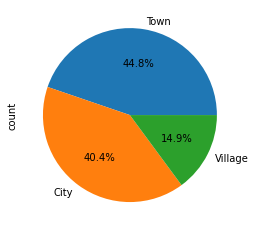

In [11]:
# vẽ biểu đồ tròn so sánh tỷ lệ churn score chủ yếu là đến từ vùng nào
df.region_category.value_counts().plot(kind='pie',autopct="%1.1f%%") # draw the pie plot of region_category to compare all values inside this columns

<AxesSubplot:ylabel='count'>

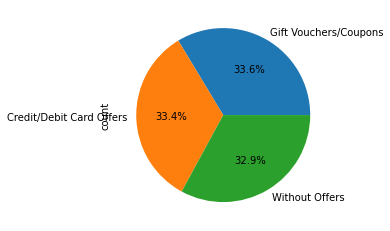

In [12]:
# thống kê xem tỷ lệ nào nhiều nhất trong cột preferred_offoer_types
df.preferred_offer_types.value_counts().plot(kind='pie',autopct="%1.1f%%") # draw the pie plot of region_category to compare all values inside this columns

In [ ]:
# khai báo hàm thư viện và sử dụng hàm để trực quan các dữ liệu hiện có và xuất ra các thông tin cần thiết cho bài làm ví dụ nhưng missing cells
from pandas_profiling import ProfileReport

ProfileReport(df)

C:\Users\nguye\AppData\Local\Temp\ipykernel_11776\4285769284.py:2: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
# tính trung bình của một points in wallet để fillna bằng giá trị mean
points_in_wallet_mean = np.mean(df['points_in_wallet'])

In [ ]:
# Fill các giá trị null bằng trung bình hoặc replace bằng giá trị object nào nhiều nhất trong cột đó (dựa vào thống kê của 2 biểu đồ tròn ở trên)
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    df["region_category"].fillna("Town", inplace = True)
    df["preferred_offer_types"].fillna("Gift Vouchers/Coupons", inplace = True)
    df["points_in_wallet"].fillna(points_in_wallet_mean, inplace = True)
    df.drop("referral_id", axis=1, inplace=True)
    return df

In [ ]:
# in kết quả
df = preprocessing_data(df.copy())

In [ ]:
# kiểm tra lại tổng các giá trị null ở từng cột
df.isnull().sum()

In [ ]:
# draw the boxplot of  numerical_cols
fig, axes=plt.subplots(len(numerical_cols), 1, figsize=(14, 2*len(numerical_cols)),sharex=False,sharey=False)

for i, column in enumerate(numerical_cols):
    sns.boxplot(x=column,data=df,palette='crest',ax=axes[i])
plt.tight_layout(pad=2.0)

In [ ]:
# in ra 5 dòng đầu tiên của bảng dữ liệu
df.head()

## Feature Engineering

In [ ]:
# khai báo thư viện seaborn để vẽ mô hình tương quan
import seaborn as sns

In [ ]:
# check xem định dạng ở mỗi cột là giá trị object hay float hay int để chuyển về 1 kiểu dữ liệu
df.info()

In [ ]:
# thay thế các giá trị error trong cột avg_frequency_login days bằng giá trị 0
df.loc[df['avg_frequency_login_days'] == 'Error','avg_frequency_login_days'] =  0
df

In [ ]:
pip install category-encoders # cài dặt thư viện cần dùng

In [ ]:
# khai báo hàm thư viện cần dùng
from sklearn.preprocessing import LabelEncoder 

In [ ]:
# chuyển đổi kiểu dữ liệu từ  dạng categorical sang dạng numerical
LE = LabelEncoder()
df['Name'] = LE.fit_transform(df['Name'])
df['security_no'] = LE.fit_transform(df['security_no'])
df['joining_date'] = LE.fit_transform(df['joining_date'])
df['last_visit_time'] = LE.fit_transform(df['last_visit_time'])
df['feedback'] = LE.fit_transform(df['feedback'])
df['customer_id'] = LE.fit_transform(df['customer_id'])

In [ ]:
def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    df["region_category"] = df["region_category"].astype("category").cat.codes
    df["gender"] = df["gender"].astype("category").cat.codes
    df["membership_category"] = df["membership_category"].astype("category").cat.codes
    df["joined_through_referral"] = df["joined_through_referral"].astype("category").cat.codes
    df["preferred_offer_types"] = df["preferred_offer_types"].astype("category").cat.codes
    df["medium_of_operation"] = df["medium_of_operation"].astype("category").cat.codes
    df["internet_option"] = df["internet_option"].astype("category").cat.codes
    df["used_special_discount"] = df["used_special_discount"].astype("category").cat.codes
    df["offer_application_preference"] = df["offer_application_preference"].astype("category").cat.codes
    df["past_complaint"] = df["past_complaint"].astype("category").cat.codes
    df["complaint_status"] = df["complaint_status"].astype("category").cat.codes
    df["avg_frequency_login_days"] = df["avg_frequency_login_days"].astype("category").cat.codes
    return df

In [ ]:
# in kết quả của hàm trên
df = apply_feature_engineering(df)

In [ ]:
# kiểm tra lại định dạng của mỗi cột
df.info()

In [ ]:
# vẽ heatmap sau khi chuẩn hóa dữ liệu
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [ ]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes
    feature_names = df.columns.tolist()
    feature_names.remove("churn_risk_score")
    X = df[feature_names].values
    y = df.churn_risk_score.values
    return X, y

In [ ]:
X, y = prepare_X_y(df)

# Apply machine learning model

## Train - test split

In [ ]:
# chia tập train và tập test với tập train là 0,3 và random state là 42
from sklearn.model_selection import train_test_split
RANDOM_STATE = 42
TRAIN_SIZE = 0.7

X_train, X_test ,Y_train, Y_test = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK - learn model

In [ ]:
# Khai báo hàm thư viện cần dùng
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## Model of decision trees

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# tạo hàm để xuất ra các giá trị accuracy, matrix, và bảng báo cáo cụ thể các số liệu của model
def print_score(clf, X_train, Y_train, X_test, Y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(Y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(Y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(Y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(Y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(Y_test, pred)}\n")

In [ ]:
# Model decision tree và mesure perform model khi không dùng pipeline
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, Y_train)

print_score(tree_clf, X_train, Y_train, X_test, Y_test, train=True)
print_score(tree_clf, X_train, Y_train, X_test, Y_test, train=False)

In [ ]:
# Model decision tree và mesure perform model khi dùng pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
pipe = Pipeline(steps=[("tree", tree_clf)])
tree_cv = GridSearchCV(
    tree_clf, 
    params, 
    scoring="f1", 
    n_jobs=2, 
)

tree_cv.fit(X_train, Y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, Y_train)
print_score(tree_clf, X_train, Y_train, X_test, Y_test, train=True)
print_score(tree_clf, X_train, Y_train, X_test, Y_test, train=False)

## Using random - forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier # khai báo hàm thư viện cần dùng

In [ ]:
# Model random - forest và mesure perform model khi không dùng pipeline
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, Y_train)

print_score(rf_clf, X_train, Y_train, X_test, Y_test, train=True)
print_score(rf_clf, X_train, Y_train, X_test, Y_test, train=False)

In [ ]:
# # Model random - forest và mesure perform model khi dùng pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
}


rff_clf = RandomForestClassifier()
pipe = Pipeline(steps=[("rf", rff_clf)])
rf_cv = GridSearchCV(
    rff_clf, 
    params, 
    scoring="f1", 
    n_jobs=2, 
)

tree_cv.fit(X_train, Y_train)

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)
print_score(rf_clf, X_train, Y_train, X_test, Y_test, train=True)
print_score(rf_clf, X_train, Y_train, X_test, Y_test, train=False)

## Using XGBoost

In [ ]:
# khai báo hàm thư viện cần dùng
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
# khai báo hàm thư viện cần dùng
from xgboost import XGBRegressor

In [ ]:
# dùng để check lỗi invalid classes trên tập train
unique_values = set(Y_train)
expected_values = set([0, 1, 2, 3, 4, 5])
if unique_values != expected_values:
    print("Error: Invalid classes inferred from unique values of `y`.")

In [ ]:
# # Model xgboost và mesure perform model khi  dùng pipeline
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

Y_train = pd.Series(Y_train)
Y_train.replace(-1, 6, inplace=True)
Y_train.replace(6, 0, inplace=True)

params = {}

xgb_clf = XGBClassifier()
pipe = Pipeline(steps=[("xgb", xgb_clf)])
xgb_cv = GridSearchCV(
    xgb_clf, 
    params, 
    scoring="f1", 
    n_jobs=2, 
)

xgb_cv.fit(X_train, Y_train.values)

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, Y_train.values)
print_score(xgb_clf, X_train, Y_train.values, X_test, Y_test, train=True)
print_score(xgb_clf, X_train, Y_train.values, X_test, Y_test, train=False)


## Using catboost 

In [ ]:
# Khai báo hàm thư viện cần dùng
from catboost import CatBoostRegressor
from catboost import CatBoostClassifier

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [ ]:
CatBoost_model = CatBoostRegressor()
CatBoost_model.fit(X_train, Y_train)

In [ ]:
cb_clf = CatBoostClassifier()
pipe = Pipeline(steps=[("cb", cb_clf)])

In [ ]:
cb_clf.fit(X_train, Y_train)

In [ ]:
# Dự đoán trên tập test
y_pred = cb_clf.predict(X_test)

# Đánh giá độ chính xác của mô hình
acc = accuracy_score(Y_test, y_pred)
print("Accuracy on testing: ", acc)


In [ ]:
# Dự đoán trên tập test
y_pred = cb_clf.predict(X_train)

# Đánh giá độ chính xác của mô hình
acc = accuracy_score(Y_train, y_pred)
print("Accuracy on training: ", acc)

## REPORT:
- Theo em đối với tập dữ liệu mô tả số lượng khách hàng rời khỏi doanh nghiệp trong một khoản thời gian cụ thể và bắt mỗi người dùng được gán với một giá trị dự đoán ước tính trạng thái churn của họ tại bất kỳ thời điểm nào thì chủ yếu em sẽ đánh giá mô hình dựa trên chỉ số accuracy. Vì độ chính xác này sẽ đo lường tỷ lệ phần trắm khách hàng được dự đoán đúng về việc họ có rời khỏi dịch vụ hay không rời. 
- Mô hình quan trọng của em trong bài này là decision tree và random forest. Tuy nhiên nếu xét về độ phù hợp với yêu cầu của bài này em sẽ chọn random forest làm mô hình chính bới vì theo em độ chính xác là quan trọng nhất trong bài này mà random forest là dạng cho ra hai kết quả accuracy đều tốt nhất trên cả tập train và tập test. Ở random-forest khi dùng pipeline thì e có accuracy trên tập train là 100% và trên tập test là 74,14%. Và nó cũng cho ra kết quả rất tốt trên tập train và test kể cả khi em ko dùng pipeline , với các chỉ số là 73,89% và 100% lần lượt đại diện cho chỉ số accuracy trên tập test và accuracy trên tập train. Bên cạnh đó em cũng vẽ thêm model decision tree, xgboost và catboost để so sánh hiệu suất giữa các mô hình. Tuy nhiên nếu xếp sau random - forest sẽ là decision tree và nó cũng cho kết quả tốt trên tập train với chỉ số accuracy là 100%, tương tự với tập test với chỉ số accuracy là 70,44% (khi dùng pipeline). Từ những điều này có thể thấy được rằng mô hình random - forest sẽ cho ra kết quả tốt nhất với dạng bài này